In [14]:
from libary import BJH_calculation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [40]:
df_iso = pd.read_excel('libary/test_isos.xlsx',sheetname= '4_34_H1_N2') # 3_14_F1_N2
p_rels = df_iso['p_rels'].values
q_abs =  df_iso['q_abs'].values
df_psd = pd.read_excel('libary/test_psds.xlsx', sheetname='4_34_H1_N2')
Pore_D = df_psd['D'].values
Pore_volume = df_psd['IPV'].values

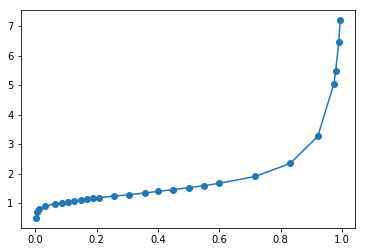

In [41]:
plt.plot(p_rels,q_abs,'o-')

0.306420295624 1.28410370755 0.993919891609 7.19734209724


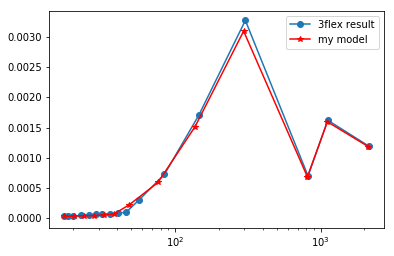

In [42]:
# When set use_pressure = False
solution = BJH_calculation.BJH_method(p=p_rels,q=q_abs, use_pressure =False, gas_type='N2')
solution.do_BJH()
plt.semilogx(Pore_D,Pore_volume,'o-',label='3flex result')
plt.plot(solution.Davg, solution.Vp,'r*-', label='my model')
plt.xlim()
plt.legend()

0.30384122506 1.28133786361 0.994061453291 7.22337528348


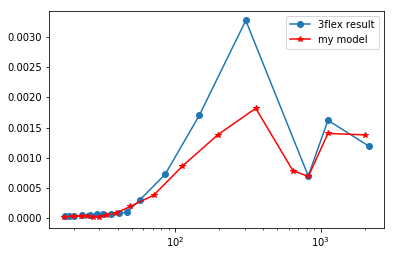

In [43]:
# When set use_pressure = True
solution = BJH_calculation.BJH_method(p=p_rels,q=q_abs, use_pressure = True, gas_type='N2')
solution.do_BJH()
plt.semilogx(Pore_D,Pore_volume,'o-',label='3flex result')
plt.plot(solution.Davg, solution.Vp,'r*-', label='my model')
plt.xlim()
plt.legend()